In [1]:
# Typical PyTorch Pipeline
# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) training Loop
#    - forward pass: compute prediction
#    - backward pass: gradients
#    - update weights
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

torch.Size([100])
torch.Size([100, 1])
epoch: 10 | loss = 4344.846191
epoch: 20 | loss = 3241.901855
epoch: 30 | loss = 2444.061768
epoch: 40 | loss = 1866.300293
epoch: 50 | loss = 1447.488770
epoch: 60 | loss = 1143.615967
epoch: 70 | loss = 922.947998
epoch: 80 | loss = 762.575439
epoch: 90 | loss = 645.938721
epoch: 100 | loss = 561.053162


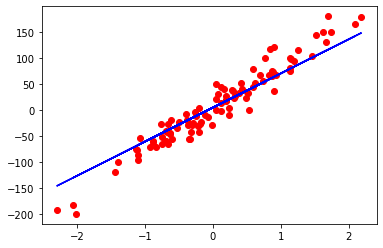

In [9]:
# 0) prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)  # regression dataset 생성

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
print(y.shape)

# Reshape y [100] -> [100, 1]   (row: 100, column:1)
y = y.view(y.shape[0], 1)
print(y.shape)

n_samples, n_features = X.shape
# 1) Model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) define loss and optimizer
# MSELoss
criterion = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y) # input, target
    
    # Backward pass
    loss.backward()

    # Update weight
    optimizer.step()
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1} | loss = {loss:.6f}')

# plot
predicted = model(X).detach().numpy()   # Computation Graph에서 해당 연산 tracking되는 것 막기 위해 detach
plt.plot(X_numpy, y_numpy, 'ro')    # 실제 데이터의 분포 plot
plt.plot(X_numpy, predicted, 'b')   # Linear regression model plot
plt.show()